In [ ]:
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
#epochs = 100 # iterations over dataset

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
y_test.shape

(10000, 100)

In [ ]:
#initializer = keras.initializers.HeNormal()
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)
initializer = None

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_initializer=initializer,kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=64,kernel_initializer=initializer,kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128,kernel_initializer=initializer,kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=128,kernel_initializer=initializer,kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.5))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,kernel_initializer=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(units=4096,kernel_initializer=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes,kernel_initializer=initializer, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
#initial_learning_rate = 0.1
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
     #initial_learning_rate,
    #  decay_steps=1000,
    #  decay_rate=0.96,
    #  staircase=True)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9, clipvalue = 1),
              metrics=['accuracy'])

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
import datetime
import os


checkpoint = ModelCheckpoint('VGG_SGD_DROPOUT.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)
# history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
#                     steps_per_epoch = len(x_train) / 128, epochs=50, validation_data=(x_test, y_test),callbacks=[early,checkpoint])
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Epoch 1/100
391/391 [==============================] - ETA: 0s - loss: 4.6058 - accuracy: 0.0091
Epoch 00001: val_accuracy improved from -inf to 0.01000, saving model to VGG_SGD_DROPOUT.hdf5
391/391 [==============================] - 30s 78ms/step - loss: 4.6058 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/100
391/391 [==============================] - ETA: 0s - loss: 4.6056 - accuracy: 0.0092
Epoch 00002: val_accuracy did not improve from 0.01000
391/391 [==============================] - 30s 77ms/step - loss: 4.6056 - accuracy: 0.0092 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/100
391/391 [==============================] - ETA: 0s - loss: 4.6053 - accuracy: 0.0105
Epoch 00003: val_accuracy did not improve from 0.01000
391/391 [==============================] - 30s 76ms/step - loss: 4.6053 - accuracy: 0.0105 - val_loss: 4.6051 - val_accuracy: 0.0100
Epoch 4/100
391/391 [==============================] - ETA: 0s - loss: 4.6013 - accuracy: 0.0125
Epoch 000

In [ ]:

# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.6111953935180988
Recall: 0.6044
Accuracy: 0.6044


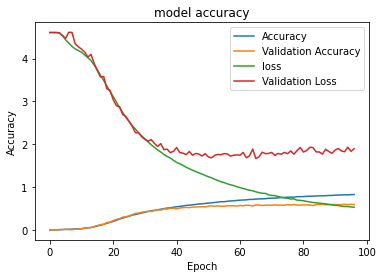

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
initializer = None

model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_initializer=initializer,kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=64,kernel_initializer=initializer,kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128,kernel_initializer=initializer,kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=128,kernel_initializer=initializer,kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.5))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.5))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,kernel_initializer=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(units=4096,kernel_initializer=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes,kernel_initializer=initializer, activation='softmax'))

model.load_weights('../weights/VGG16_SGD_With_DropOut.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
